In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2017 = pd.read_csv(
    Path('2017_data.csv')
).set_index('Month')

In [4]:
# View the dataframe
df_2017.describe()

,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,price_open.3,...,volume_traded.4,price_open.5,price_close.5,volume_traded.5,price_open.6,price_close.6,volume_traded.6,price_open.7,price_close.7,volume_traded.7
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,...,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3230.446583,4315.245000,153167.049684,192.186144,253.682859,2.085694e+06,34.520968,53.348248,1.103780e+06,0.751333,...,1.125174e+08,0.157364,0.295553,2.048826e+08,174.007163,209.402351,57949.390687,202.731526,282.253560,40871.196191
std,2781.201663,4062.339607,70533.769640,155.031003,211.450143,1.203900e+06,29.001659,62.102410,6.887225e+05,0.453774,...,2.085162e+08,0.122979,0.544850,1.902761e+08,110.576181,133.318216,35973.542518,222.668623,321.082287,31104.998764
min,968.166000,969.739000,61053.175220,8.099990,10.669110,5.982336e+05,3.770000,3.770000,7.074980e+04,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,36.916460,36.874790,4937.523761,0.000000,0.000000,0.000000
25%,1156.506000,1308.037750,90726.607107,41.174997,71.199625,9.933014e+05,6.397813,13.510970,6.920303e+05,0.701325,...,0.000000e+00,0.000000,0.000000,0.000000e+00,59.575208,85.097340,25839.357885,53.635005,69.622372,6863.210061
50%,2367.330500,2660.566500,144049.895950,214.589105,254.250000,2.023284e+06,32.422965,40.697525,1.134165e+06,1.000350,...,1.371653e+07,0.199025,0.199045,2.087990e+08,203.557435,232.680495,64777.131505,159.570070,176.618940,56792.026445
75%,4442.180000,5160.577500,216255.330750,302.670000,325.090750,2.876171e+06,55.470000,60.080200,1.497218e+06,1.005375,...,1.139832e+08,0.246298,0.245368,3.056366e+08,282.024750,291.199015,74794.968183,291.281000,344.295500,62094.063440
max,10087.800000,13990.000000,260245.317900,438.560000,745.980000,4.388107e+06,87.580000,230.300000,2.179055e+06,1.050000,...,7.207680e+08,0.332105,1.990040,5.785257e+08,300.710000,478.670000,115147.832600,779.000000,1027.191000,81831.269430


In [5]:
# Clean the dataframe to only include the closing price
final_2017_df = pd.DataFrame()
final_2017_df['BTC_Monthly_Close'] = df_2017['price_close']
final_2017_df['ETH_Monthly_Close'] = df_2017['price_close.1']
final_2017_df['LTC_Monthly_Close'] = df_2017['price_close.2']
final_2017_df['USDT_Monthly_Close'] = df_2017['price_close.3']
final_2017_df['XLM_Monthly_Close'] = df_2017['price_close.4']
final_2017_df['XRP_Monthly_Close'] = df_2017['price_close.5']
final_2017_df['ZEC_Monthly_Close'] = df_2017['price_close.6']
final_2017_df['DASH_Monthly_Close'] = df_2017['price_close.7']

final_2017_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,USDT_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,ZEC_Monthly_Close,DASH_Monthly_Close
Month,,,,,,,,
January,969.739,10.66911,4.12475,0.0000,0.002149,0.000000,39.72103,0.00000
February,1180.000,15.63000,3.77000,0.0000,0.001920,0.000000,36.87479,0.00000
March,1079.780,49.69750,7.07063,0.0000,0.002282,0.000000,62.22333,0.00000
April,1350.717,78.36700,15.65775,0.9350,0.004805,0.000000,92.72201,92.82983
May,2291.301,228.50000,25.78000,1.0571,0.034000,0.249367,231.36099,137.37001
June,2445.000,280.00000,39.04784,1.0061,0.026694,0.244035,294.79606,174.73788
July,2876.133,201.77770,42.34721,1.0025,0.016269,0.165100,174.00000,178.50000
August,4737.270,388.00300,73.37080,1.0046,0.000000,0.260000,290.00000,387.18200
September,4344.000,302.20000,55.65000,0.9998,0.000000,0.199030,277.00000,330.00000


In [6]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2017_df = final_2017_df['BTC_Monthly_Close'].pct_change().fillna(0)
btc_2017_df

Month
January      0.000000
February     0.216822
March       -0.084932
April        0.250919
May          0.696359
June         0.067079
July         0.176333
August       0.647097
September   -0.083016
October      0.480318
November     0.568852
December     0.386727
Name: BTC_Monthly_Close, dtype: float64

In [7]:
eth_2017_df = final_2017_df['ETH_Monthly_Close'].pct_change().fillna(0)
eth_2017_df

Month
January      0.000000
February     0.464977
March        2.179623
April        0.576880
May          1.915768
June         0.225383
July        -0.279365
August       0.922923
September   -0.221140
October      0.006353
November     0.444331
December     0.698304
Name: ETH_Monthly_Close, dtype: float64

In [8]:
ltc_2017_df = final_2017_df['LTC_Monthly_Close'].pct_change().fillna(0)
ltc_2017_df

Month
January      0.000000
February    -0.086005
March        0.875499
April        1.214477
May          0.646469
June         0.514656
July         0.084496
August       0.732601
September   -0.241524
October     -0.003235
November     0.579052
December     1.629296
Name: LTC_Monthly_Close, dtype: float64

In [9]:
usdt_2017_df = final_2017_df['USDT_Monthly_Close'].drop(
    labels=['January', 'February', 'March']).pct_change().fillna(0)
usdt_2017_df

Month
April        0.000000
May          0.130588
June        -0.048245
July        -0.003578
August       0.002095
September   -0.004778
October      0.000100
November     0.006801
December     0.012218
Name: USDT_Monthly_Close, dtype: float64

In [10]:
xlm_2017_df = final_2017_df['XLM_Monthly_Close'].drop(
    labels=['August', 'September', 'October', 'November', 'December']).pct_change().fillna(0)
xlm_2017_df

Month
January     0.000000
February   -0.106561
March       0.188542
April       1.105609
May         6.075963
June       -0.214882
July       -0.390537
Name: XLM_Monthly_Close, dtype: float64

In [11]:
xrp_2017_df = final_2017_df['XRP_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April']).pct_change().fillna(0)
xrp_2017_df

Month
May          0.000000
June        -0.021382
July        -0.323458
August       0.574803
September   -0.234500
October      0.000151
November     0.205667
December     7.291833
Name: XRP_Monthly_Close, dtype: float64

In [12]:
zec_2017_df = final_2017_df['ZEC_Monthly_Close'].pct_change().fillna(0)
zec_2017_df

Month
January      0.000000
February    -0.071656
March        0.687422
April        0.490149
May          1.495211
June         0.274182
July        -0.409761
August       0.666667
September   -0.044828
October     -0.155235
November     0.288291
December     0.587839
Name: ZEC_Monthly_Close, dtype: float64

In [13]:
dash_2017_df = final_2017_df['DASH_Monthly_Close'].drop(
    labels=['January', 'February', 'March']).pct_change().fillna(0)
dash_2017_df

Month
April        0.000000
May          0.479805
June         0.272023
July         0.021530
August       1.169087
September   -0.147688
October     -0.153394
November     1.791367
December     0.317161
Name: DASH_Monthly_Close, dtype: float64

In [14]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2017_df.var()
market_var

0.07702062914668639

In [15]:
btc_var = btc_2017_df.var()
btc_var

0.07702062914668639

In [16]:
eth_var = eth_2017_df.var()
eth_var

0.6070734997335074

In [17]:
ltc_var = ltc_2017_df.var()
ltc_var

0.32524631881175475

In [18]:
usdt_var = usdt_2017_df.var()
usdt_var

0.0023261794513036666

In [19]:
xlm_var = xlm_2017_df.var()
xlm_var

5.3420546538365095

In [20]:
xrp_var = xrp_2017_df.var()
xrp_var

6.669322635535075

In [21]:
zec_var = zec_2017_df.var()
zec_var

0.2624818425762632

In [22]:
dash_var = dash_2017_df.var()
dash_var

0.43299428330343614

In [23]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

# market_cov = final_2018_df['BTC_Monthly_Close'].cov(final_2018_df['BTC_Monthly_Close'])
# market_cov

mkt_2017_cov = btc_2017_df.cov(btc_2017_df)
mkt_2017_cov

0.07702062914668642

In [24]:
eth_2017_cov = eth_2017_df.cov(btc_2017_df)
eth_2017_cov

0.052901356351383946

In [25]:
ltc_2017_cov = ltc_2017_df.cov(btc_2017_df)
ltc_2017_cov

0.04700978261196384

In [26]:
usdt_2017_cov = usdt_2017_df.cov(btc_2017_df)
usdt_2017_cov

0.00796408058205679

In [27]:
xlm_2017_cov = xlm_2017_df.cov(btc_2017_df)
xlm_2017_cov

0.5213475900801245

In [28]:
xrp_2017_cov = xrp_2017_df.cov(btc_2017_df)
xrp_2017_cov

0.07378355263230235

In [29]:
zec_2017_cov = zec_2017_df.cov(btc_2017_df)
zec_2017_cov

0.0667143414743076

In [30]:
dash_2017_cov = dash_2017_df.cov(btc_2017_df)
dash_2017_cov

0.1079407087523862

In [31]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2017 = mkt_2017_cov / market_var
btc_beta_2017

1.0000000000000004

In [32]:
eth_beta_2017 = eth_2017_cov / market_var
eth_beta_2017

0.6868465882125281

In [33]:
ltc_beta_2017 = ltc_2017_cov / market_var
ltc_beta_2017

0.6103531369814357

In [34]:
usdt_beta_2017 = usdt_2017_cov / market_var
usdt_beta_2017

0.10340191543864354

In [35]:
xlm_beta_2017 = xlm_2017_cov / market_var
xlm_beta_2017

6.768934451148327

In [36]:
xrp_beta_2017 = xrp_2017_cov / market_var
xrp_beta_2017

0.9579713052172165

In [37]:
zec_beta_2017 = zec_2017_cov / market_var
zec_beta_2017

0.8661879578683993

In [38]:
dash_beta_2017 = dash_2017_cov / market_var
dash_beta_2017

1.401451922014455

<AxesSubplot:>

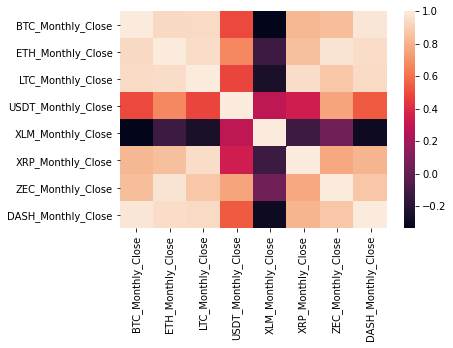

In [39]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2017_df.corr()
sns.heatmap(correlation)